In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import datetime
from calendar import isleap
import missingno as msno
from sklearn.externals import joblib

In [16]:
# Read previusly transformed dataframe
df = joblib.load('J:/Source/Exercises/Exercise2/TransformedData.pkl')
df.head()

,household_id,session_start,session_end,channel_name,title,original_broadcast_start,original_broadcast_end,session_type,session_sub_type,genre,...,age_bins,sessionLengthSeconds,sessionLengthHours,broadcastLengthSeconds,broadcastLengthHours,startDifference,sessionStartHour,sessionStartDay,broadcastStartHour,broadcastStartDay
0,432215006,2016-04-09 08:36:52,2016-04-09 08:51:52,Nick Junior,Paw Patrol,2016-04-08 10:30:00,2016-04-08 10:45:00,TIMESHIFT,SERIES LINK BOOKING,Kids/Youth,...,NaN,900,0.25,900.0,0.25,79612.0,8,5,10.0,4.0
1,432215006,2016-04-27 10:03:48,2016-04-27 10:03:48,Nick Junior,Paw Patrol,2016-04-27 10:00:00,2016-04-27 10:15:00,TIMESHIFT,BUFFER,Kids/Youth,...,NaN,0,0.00,900.0,0.25,228.0,10,2,10.0,2.0
2,432215006,2016-04-27 17:03:48,2016-04-27 17:03:48,Nick Junior,Paw Patrol,2016-04-27 17:00:00,2016-04-27 17:15:00,TIMESHIFT,BUFFER,Kids/Youth,...,NaN,0,0.00,900.0,0.25,228.0,17,2,17.0,2.0
3,432215006,2016-04-18 09:02:46,2016-04-18 09:17:46,Nick Junior,Paw Patrol,2016-04-18 08:45:00,2016-04-18 09:00:00,TIMESHIFT,BUFFER,Kids/Youth,...,NaN,900,0.25,900.0,0.25,1066.0,9,0,8.0,0.0
4,432215006,2016-04-22 17:28:45,2016-04-22 17:28:45,Nick Junior,Paw Patrol,2016-04-22 17:15:00,2016-04-22 17:30:00,TIMESHIFT,BUFFER,Kids/Youth,...,NaN,0,0.00,900.0,0.25,825.0,17,4,17.0,4.0


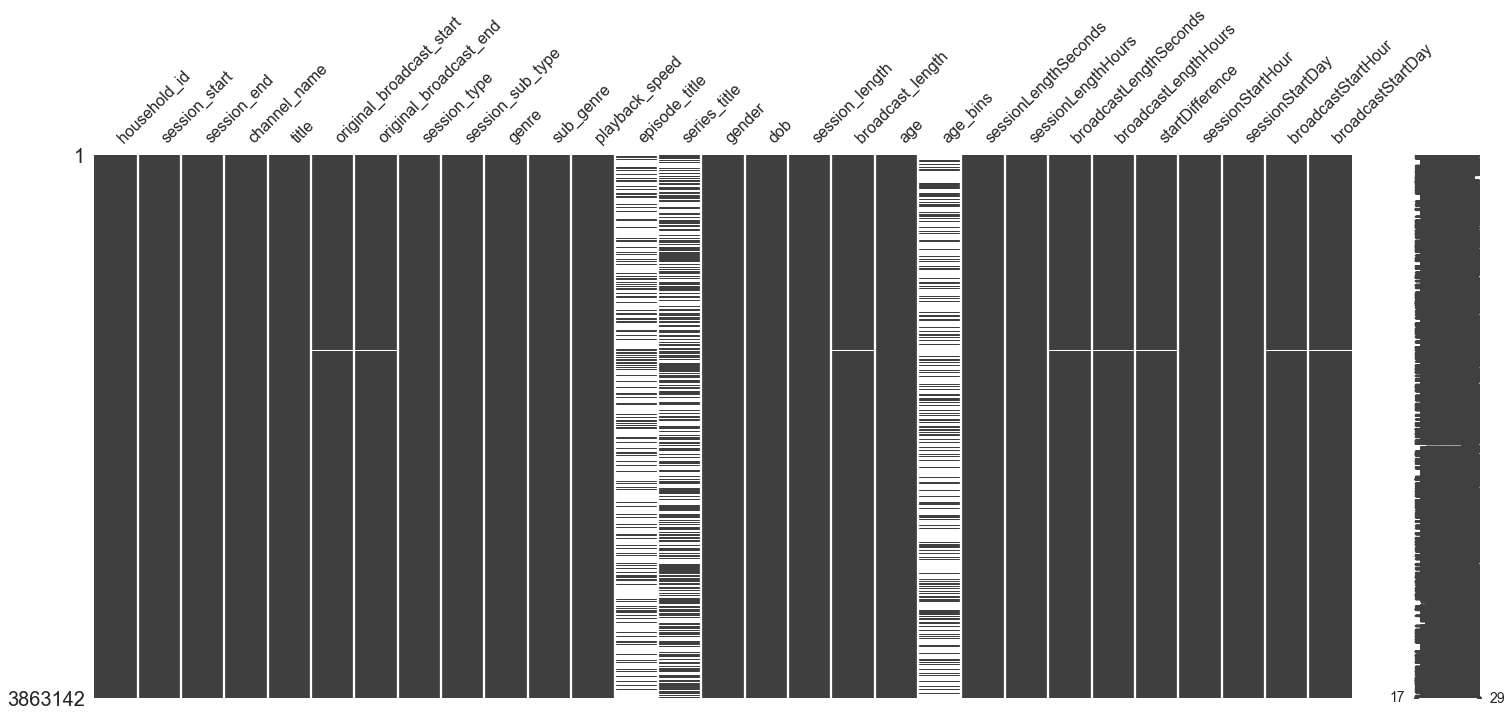

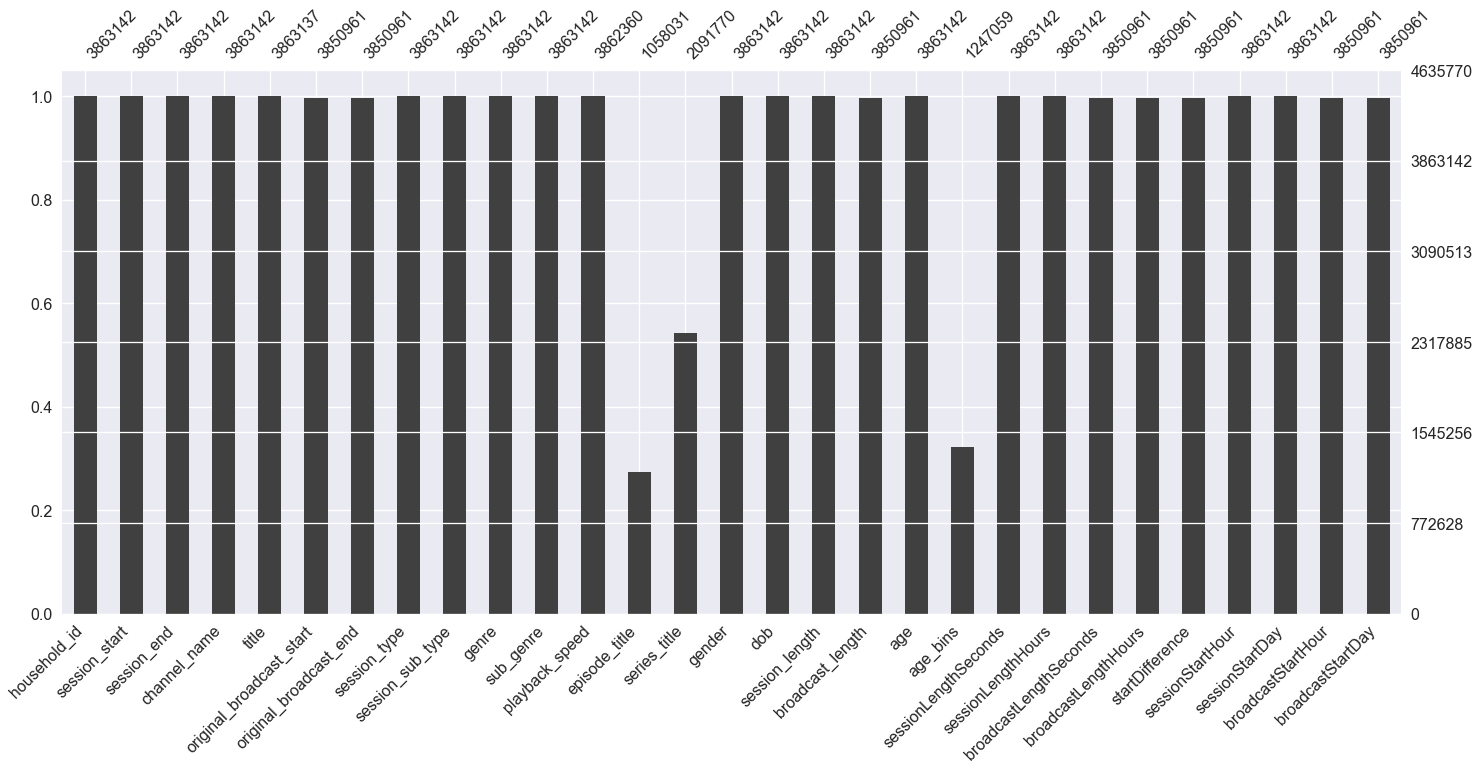

In [4]:
#Check for missing data
msno.matrix(df)
msno.bar(df)

In [5]:
# Calculate unique values for categorical features
uniqueHouseholds = df['household_id'].unique()
nUniqueHouseholds = len(uniqueHouseholds)
uniqueChannels = df['channel_name'].unique()
nUniqueChannels = len(uniqueChannels)
uniqueTitles = df['title'].unique()
nUniqueTitles = len(uniqueTitles)
uniqueSessionType = df['session_type'].unique()
nUniqueSessionType = len(uniqueSessionType)
uniqueSessionSubtype = df['session_sub_type'].unique()
nUniqueSessionSubtype = len(uniqueSessionSubtype)
uniqueGenre = df['genre'].unique()
nUniqueGenre = len(uniqueGenre)
uniqueSubgenre = df['sub_genre'].unique()
nUniqueSubgenre = len(uniqueSubgenre)
print('Households: %d; Channels: %d; Titles: %d; Session Types: %d; Session Subtypes: %d; '
      'Genres: %d; Subgenres: %d' % (nUniqueHouseholds, nUniqueChannels, nUniqueTitles, nUniqueSessionType,
                                     nUniqueSessionSubtype, nUniqueGenre, nUniqueSubgenre))

Households: 2813; Channels: 238; Titles: 12627; Session Types: 4; Session Subtypes: 10; Genres: 14; Subgenres: 72


In [6]:
# Understand timeline span
minSessionStart = df['session_start'].min()
maxSessionStart = df['session_start'].max()
minBroadcastStart = df['original_broadcast_start'].min()
maxBroadcastStart = df['original_broadcast_start'].max()
print('Sessions take place between %s and %s \nBroadcasts take place between %s and %s' %
      (minSessionStart, maxSessionStart, minBroadcastStart, maxBroadcastStart))

Sessions take place between 2016-03-31 01:20:42 and 2016-05-01 00:59:50 
Broadcasts take place between 2000-12-31 00:00:16 and 2016-05-01 00:59:45


In [7]:
# Plots popularity in terms of number of appearances
def plotViewPopularity(origDf, groupName):
    # Plot top 10
    series = origDf[groupName].value_counts().iloc[:10]
    plt.figure()
    series.plot(kind='bar', color=sns.color_palette(n_colors=1))

    # Plot worst 10
    series = origDf[groupName].value_counts().iloc[-10:].sort_values()
    plt.figure()
    series.plot(kind='bar', color=sns.color_palette(n_colors=1))


# Plots popularity in terms of session length
def plotLengthPopularity(origDf, groupName, lengthName, ax):
    series = origDf.groupby(groupName).sum()

    # Plot top 10
    series = series.sort_values(by=lengthName, ascending=False).iloc[:10, :]
    series[lengthName].plot(kind='bar', color=sns.color_palette(n_colors=1), ax=ax)
    #ax.set_title('Most popular %s by %s' % (groupName, lengthName))
    ax.set_xlabel(groupName)
    ax.set_ylabel(lengthName)

    # Plot worst 10
    # series = series.sort_values(by=lengthName, ascending=True).iloc[:10, :]
    # plt.figure()
    # series[lengthName].plot(kind='bar', color=sns.color_palette(n_colors=1))

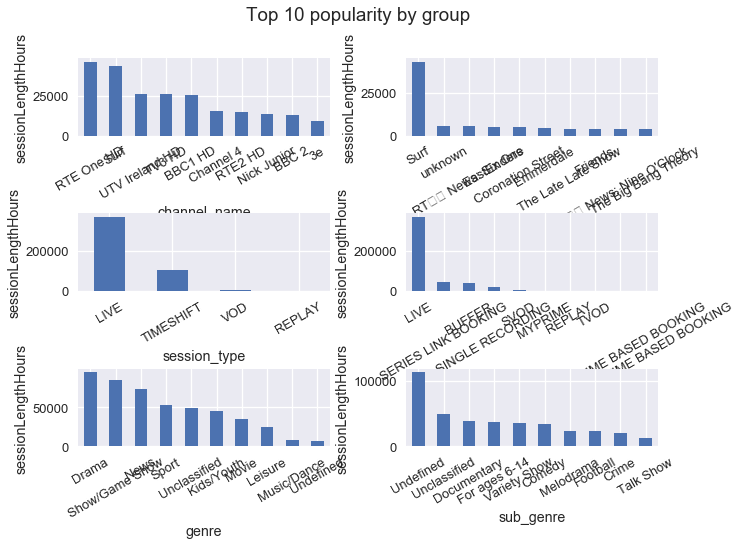

In [12]:
# View popularity (top 10)
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

# Channel Analysis
# plotViewPopularity(df, 'channel_name')
plotLengthPopularity(df, 'channel_name', 'sessionLengthHours', ax1)
# plotLengthPopularity(df, 'channel_name', 'broadcastLengthHours')

# Title Analysis
# plotViewPopularity(df, 'title')
plotLengthPopularity(df, 'title', 'sessionLengthHours', ax2)
# plotLengthPopularity(df, 'title', 'broadcastLengthHours')

# Session Type Analysis
# plotViewPopularity(df, 'session_type')
plotLengthPopularity(df, 'session_type', 'sessionLengthHours', ax3)
# plotLengthPopularity(df, 'session_type', 'broadcastLengthHours')

# Session Subtype Analysis
# plotViewPopularity(df, 'session_sub_type')
plotLengthPopularity(df, 'session_sub_type', 'sessionLengthHours', ax4)
# plotLengthPopularity(df, 'session_sub_type', 'broadcastLengthHours')

# Genre Analysis
# plotViewPopularity(df, 'genre')
plotLengthPopularity(df, 'genre', 'sessionLengthHours', ax5)
# plotLengthPopularity(df, 'genre', 'broadcastLengthHours')

# Subgenre analysis
# plotViewPopularity(df, 'sub_genre')
plotLengthPopularity(df, 'sub_genre', 'sessionLengthHours', ax6)
# plotLengthPopularity(df, 'sub_genre', 'broadcastHours')

#Rotate axis
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=30)
#Title
fig.suptitle("Top 10 popularity by group")
#Adjust layout - issues with layout in jupyter notebook
plt.subplots_adjust(wspace = 0.3, hspace = 1)

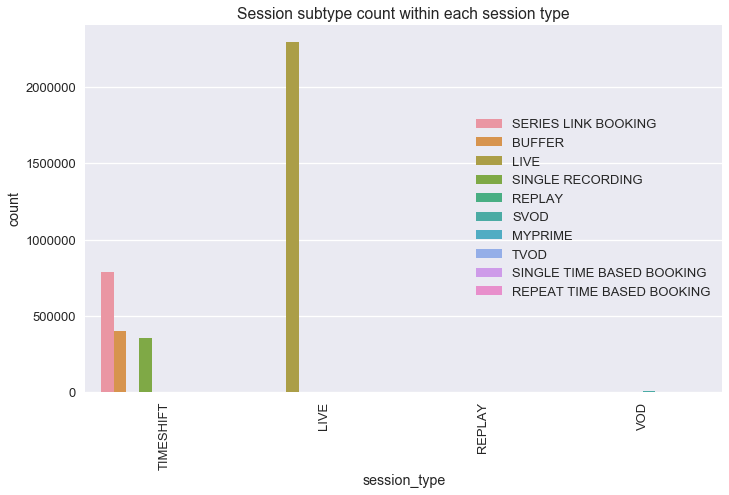

In [13]:
# What subtypes fit into what types
plt.figure()
sns.countplot(x='session_type', hue='session_sub_type', data=df)
plt.xticks(rotation=90)
plt.title('Session subtype count within each session type')
plt.legend(loc='right')
plt.tight_layout()

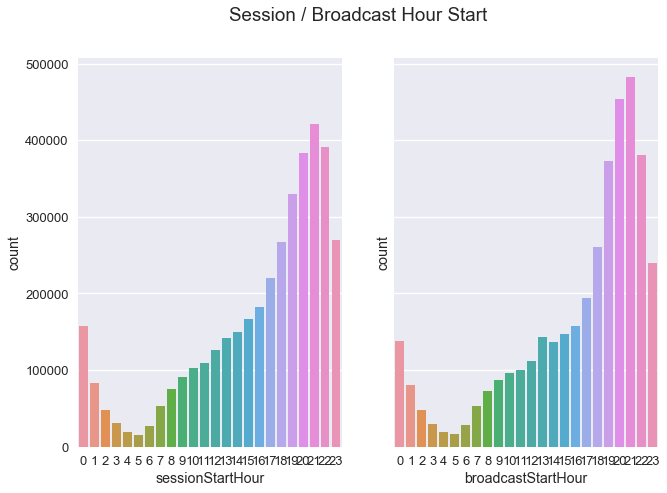

In [14]:
 #Hour when people view shows vs hour it was broadcast at
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.countplot(x=df['sessionStartHour'], ax=ax1)
sns.countplot(x=df['broadcastStartHour'], ax=ax2)
#Change broadcast labels to ints
labels = [item.get_text() for item in ax2.get_xticklabels()]
labels = [float(i) for i in labels]
labels = list(map(int, labels))
ax2.set_xticklabels(labels)
plt.suptitle('Session / Broadcast Hour Start')

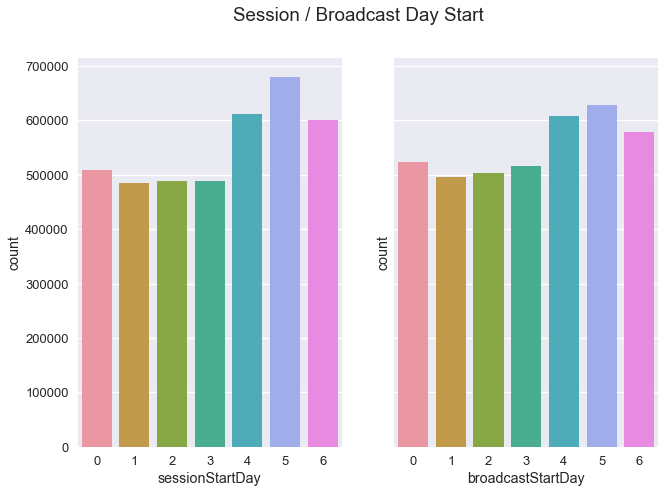

In [15]:
#Hour when people view shows vs hour it was broadcast at
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.countplot(x=df['sessionStartDay'], ax=ax1)
sns.countplot(x=df['broadcastStartDay'], ax=ax2)
#Change broadcast labels to ints
labels = [item.get_text() for item in ax2.get_xticklabels()]
labels = [float(i) for i in labels]
labels = list(map(int, labels))
ax2.set_xticklabels(labels)
plt.suptitle('Session / Broadcast Day Start')

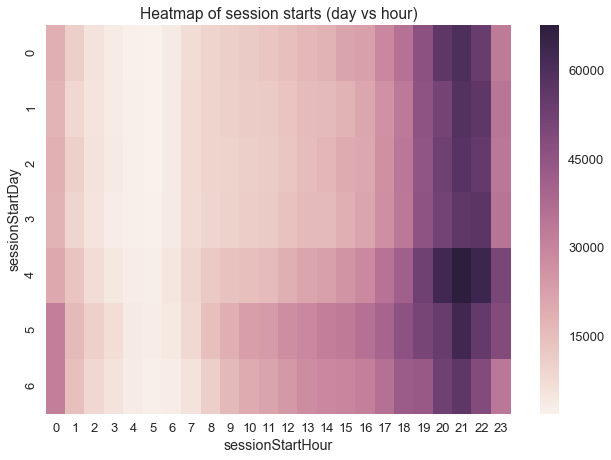

In [17]:
# Heatmap of day vs hour
grouped = df.groupby(['sessionStartHour', 'sessionStartDay']).count().iloc[:, 0].reset_index()
grouped = grouped.pivot('sessionStartDay', 'sessionStartHour', 'household_id')
plt.figure()
sns.heatmap(grouped)
plt.title('Heatmap of session starts (day vs hour)')

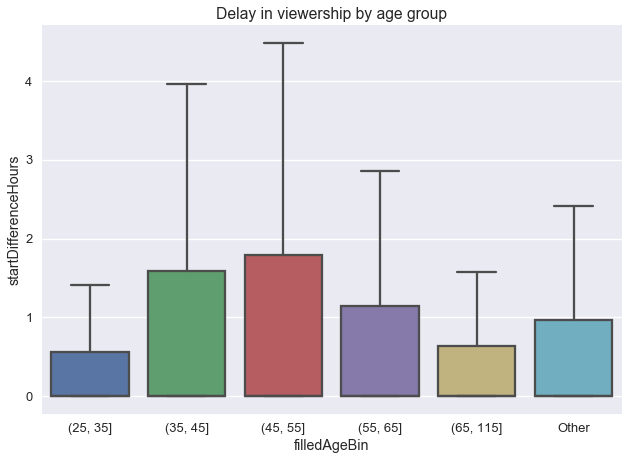

In [18]:
#How do people view shows in comparison to their original broadcast date (boxplot)
plt.figure()
df['filledAgeBin'] = df['age_bins'].cat.add_categories(['Other']).fillna('Other')
df['startDifferenceHours'] = df['startDifference'] / (60*60)
sns.boxplot(x='filledAgeBin', y='startDifferenceHours', data=df, showfliers=False)
plt.title('Delay in viewership by age group')

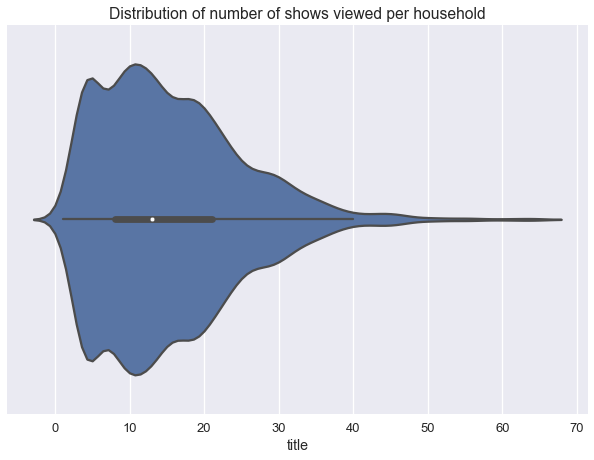

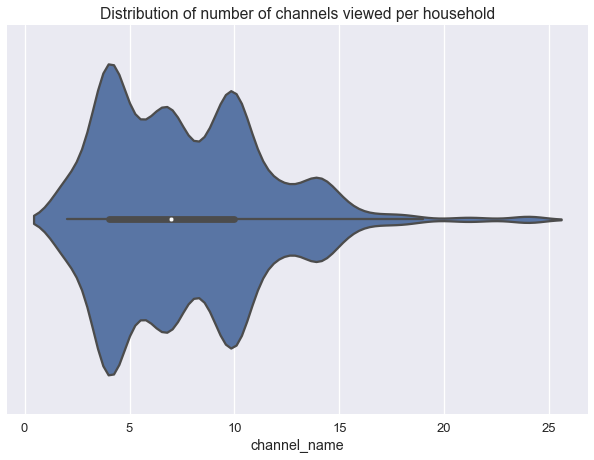

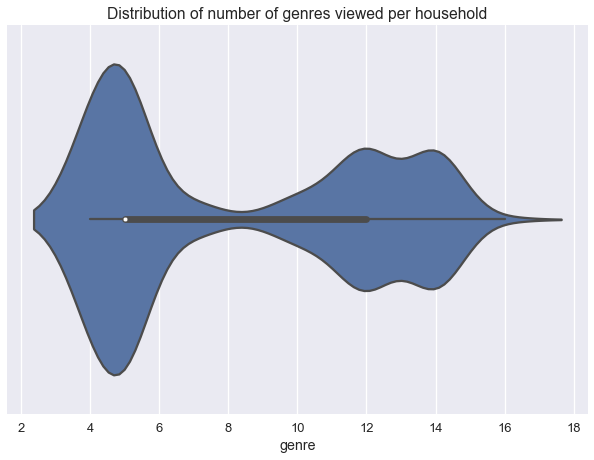

In [19]:
#How many shows / channels / genres do people in the same household watch (boxplot)
grouped = df.groupby('household_id')['title'].unique()
grouped['uniqueTitles'] = grouped.apply(lambda row: len(row[0]))
plt.figure()
sns.violinplot(grouped['uniqueTitles'])
plt.title('Distribution of number of shows viewed per household')

grouped = df.groupby('household_id')['channel_name'].unique()
grouped['uniqueChannels'] = grouped.apply(lambda row: len(row[0]))
plt.figure()
sns.violinplot(grouped['uniqueChannels'])
plt.title('Distribution of number of channels viewed per household')

grouped = df.groupby('household_id')['genre'].unique()
grouped['uniqueGenres'] = grouped.apply(lambda row: len(row[0]))
plt.figure()
sns.violinplot(grouped['uniqueGenres'])
plt.title('Distribution of number of genres viewed per household')

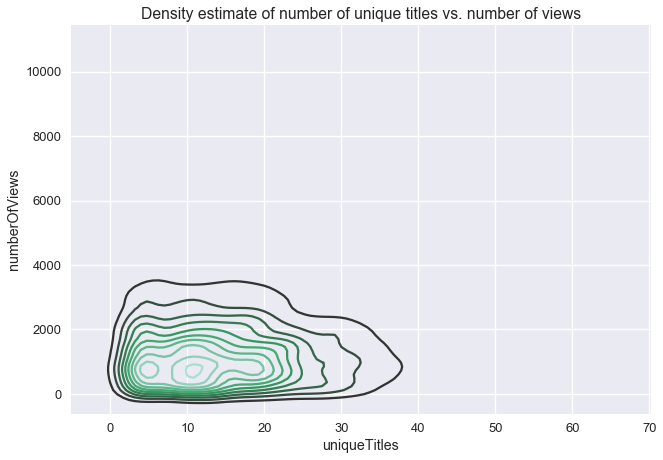

In [20]:
#Density estimate of number of unique titles vs. number of views
grouped = df.groupby('household_id')['title'].unique()
groupDf = pd.DataFrame()
groupDf['uniqueTitles'] = grouped.apply(lambda row: len(row[0]))
groupDf['numberOfViews'] = df.groupby('household_id')['title'].count()
plt.figure()
sns.kdeplot(groupDf['uniqueTitles'], groupDf['numberOfViews'])
plt.title('Density estimate of number of unique titles vs. number of views')

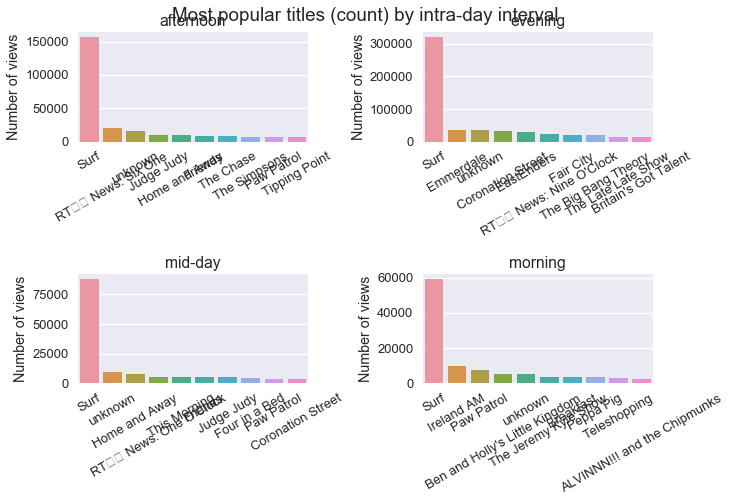

In [22]:
#What do people watch (count) in different periods of the day
tInt = {'morning': [5, 6, 7, 8, 9, 10], 'mid-day': [11, 12, 13, 14], 'afternoon': [15, 16, 17, 18],
        'evening': [19, 20, 21, 22, 23], 'night': [0, 1, 2, 3, 4]}
inv_map = {value: key for key in tInt for value in tInt[key]}
df['timeOfDay'] = df['sessionStartHour'].map(inv_map)
grouped = df.groupby('timeOfDay')
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
for (name, group), axis in zip(grouped, [ax1, ax2, ax3, ax4]):
    titleCounts = group['title'].value_counts()
    titleCounts = titleCounts.iloc[:10]
    sns.barplot(x=titleCounts.index, y=titleCounts, ax=axis)
    axis.set_title(name)
    axis.set_ylabel('Number of views')
#Rotate axis
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=30)
#Title
fig.suptitle("Most popular titles (count) by intra-day interval")
#Issues with plotting in jupyter notebook
fig.tight_layout()

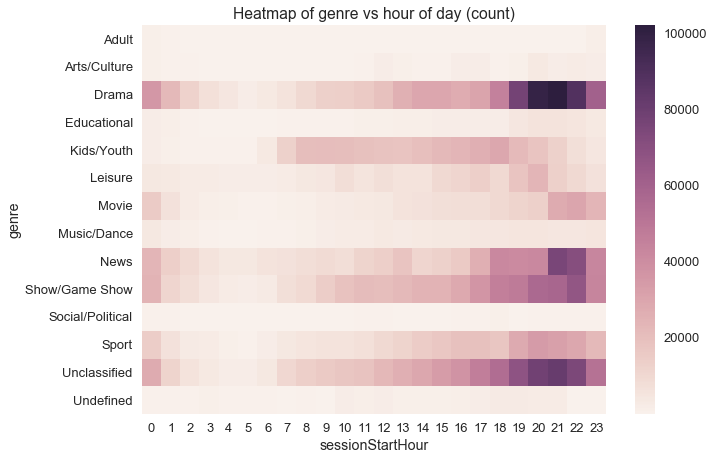

In [23]:
#Heatmaps of genre versus time(hour/day)
grouped = df.groupby(['sessionStartHour', 'genre']).count().iloc[:, 0].reset_index()
grouped = grouped.pivot('genre', 'sessionStartHour', 'household_id')
plt.figure()
sns.heatmap(grouped)
plt.yticks(rotation=0)
plt.title('Heatmap of genre vs hour of day (count)')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

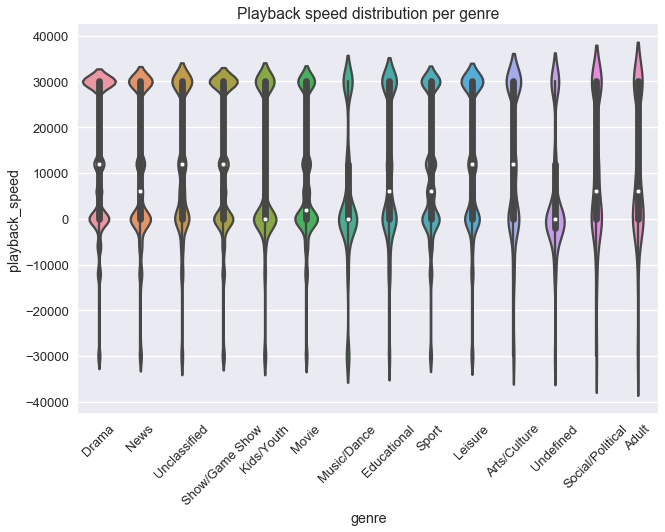

In [26]:
#Top genres where playback speed was different to 1000
playbackDf = df.loc[df['playback_speed'] != 1000]
plt.figure()
sns.violinplot(x='genre', y='playback_speed', data=playbackDf)
plt.title('Playback speed distribution per genre')
plt.xticks(rotation=45)